In [1]:
from pathlib import Path
from hjelpefunksjonar import f2t

%matplotlib widget
import pickle
import h5py

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# from check_collision import check_all_collisions
# from f import f
from rib import Rib

plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['mathtext.fontset'] = 'stix'


    

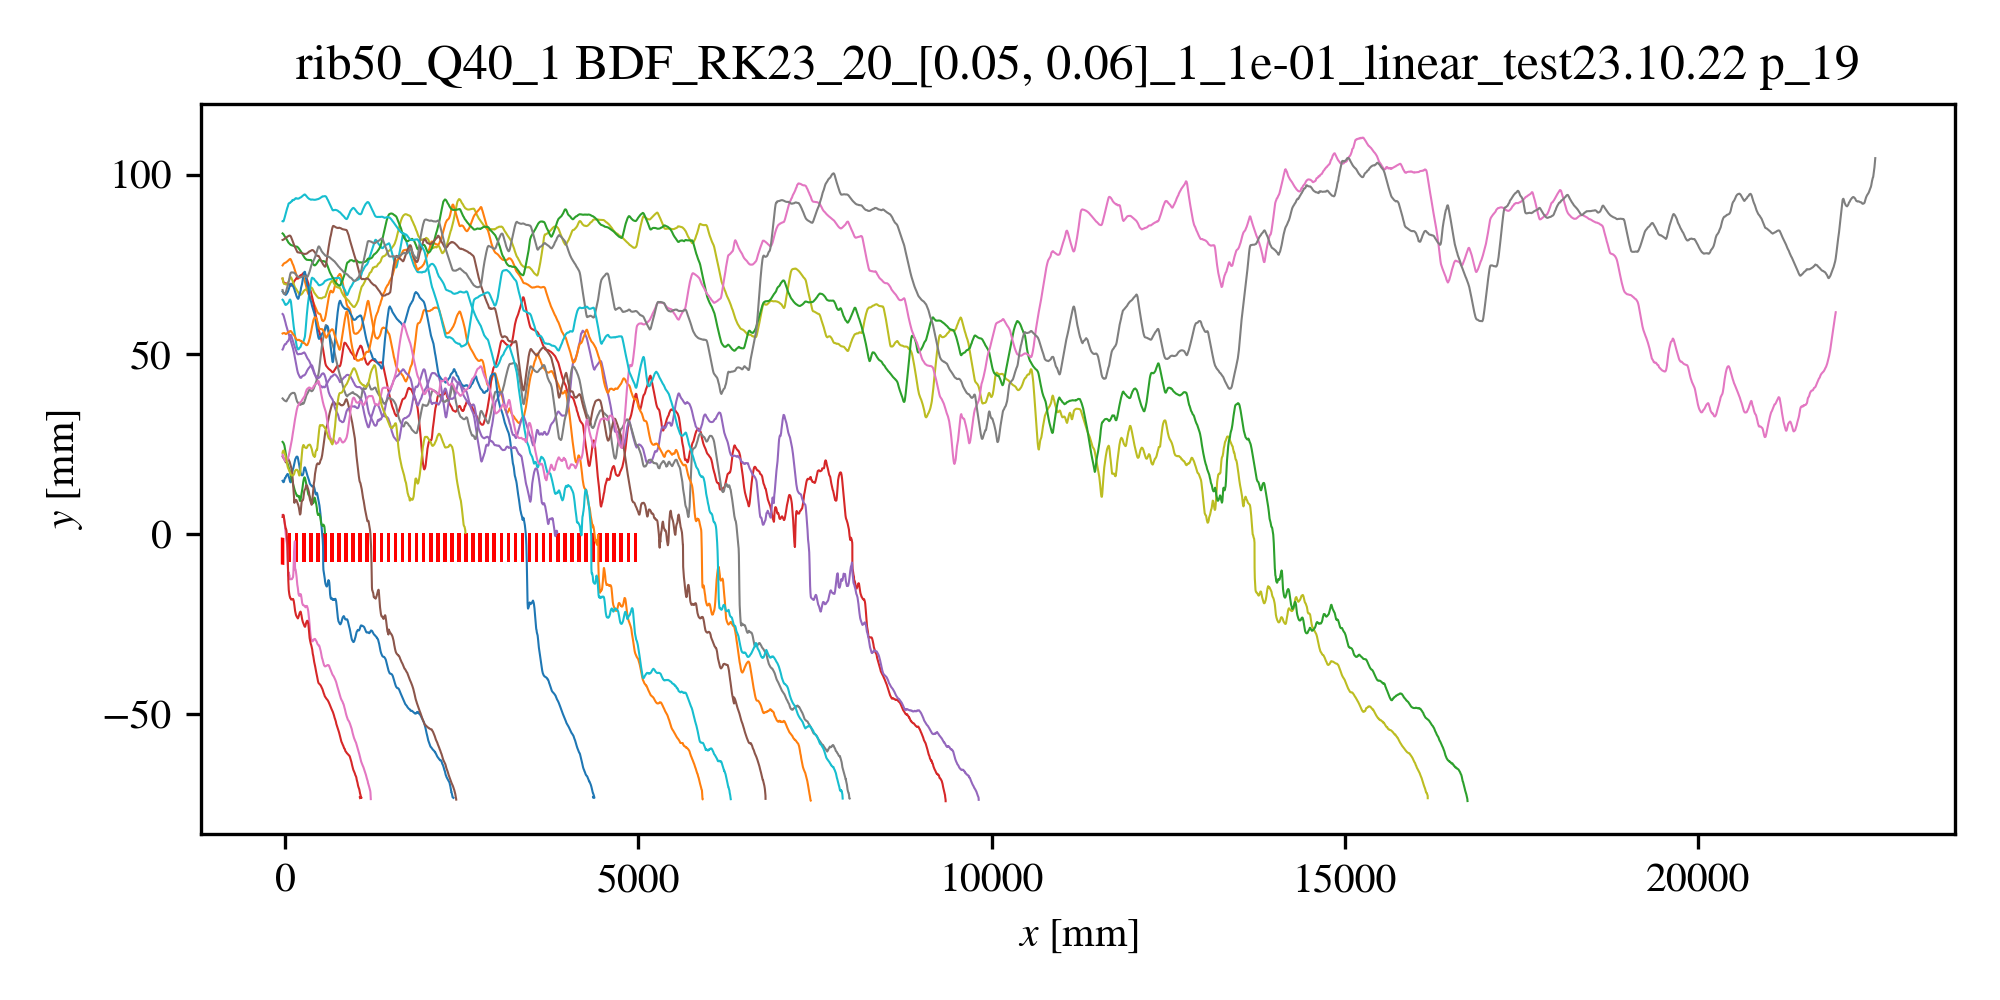

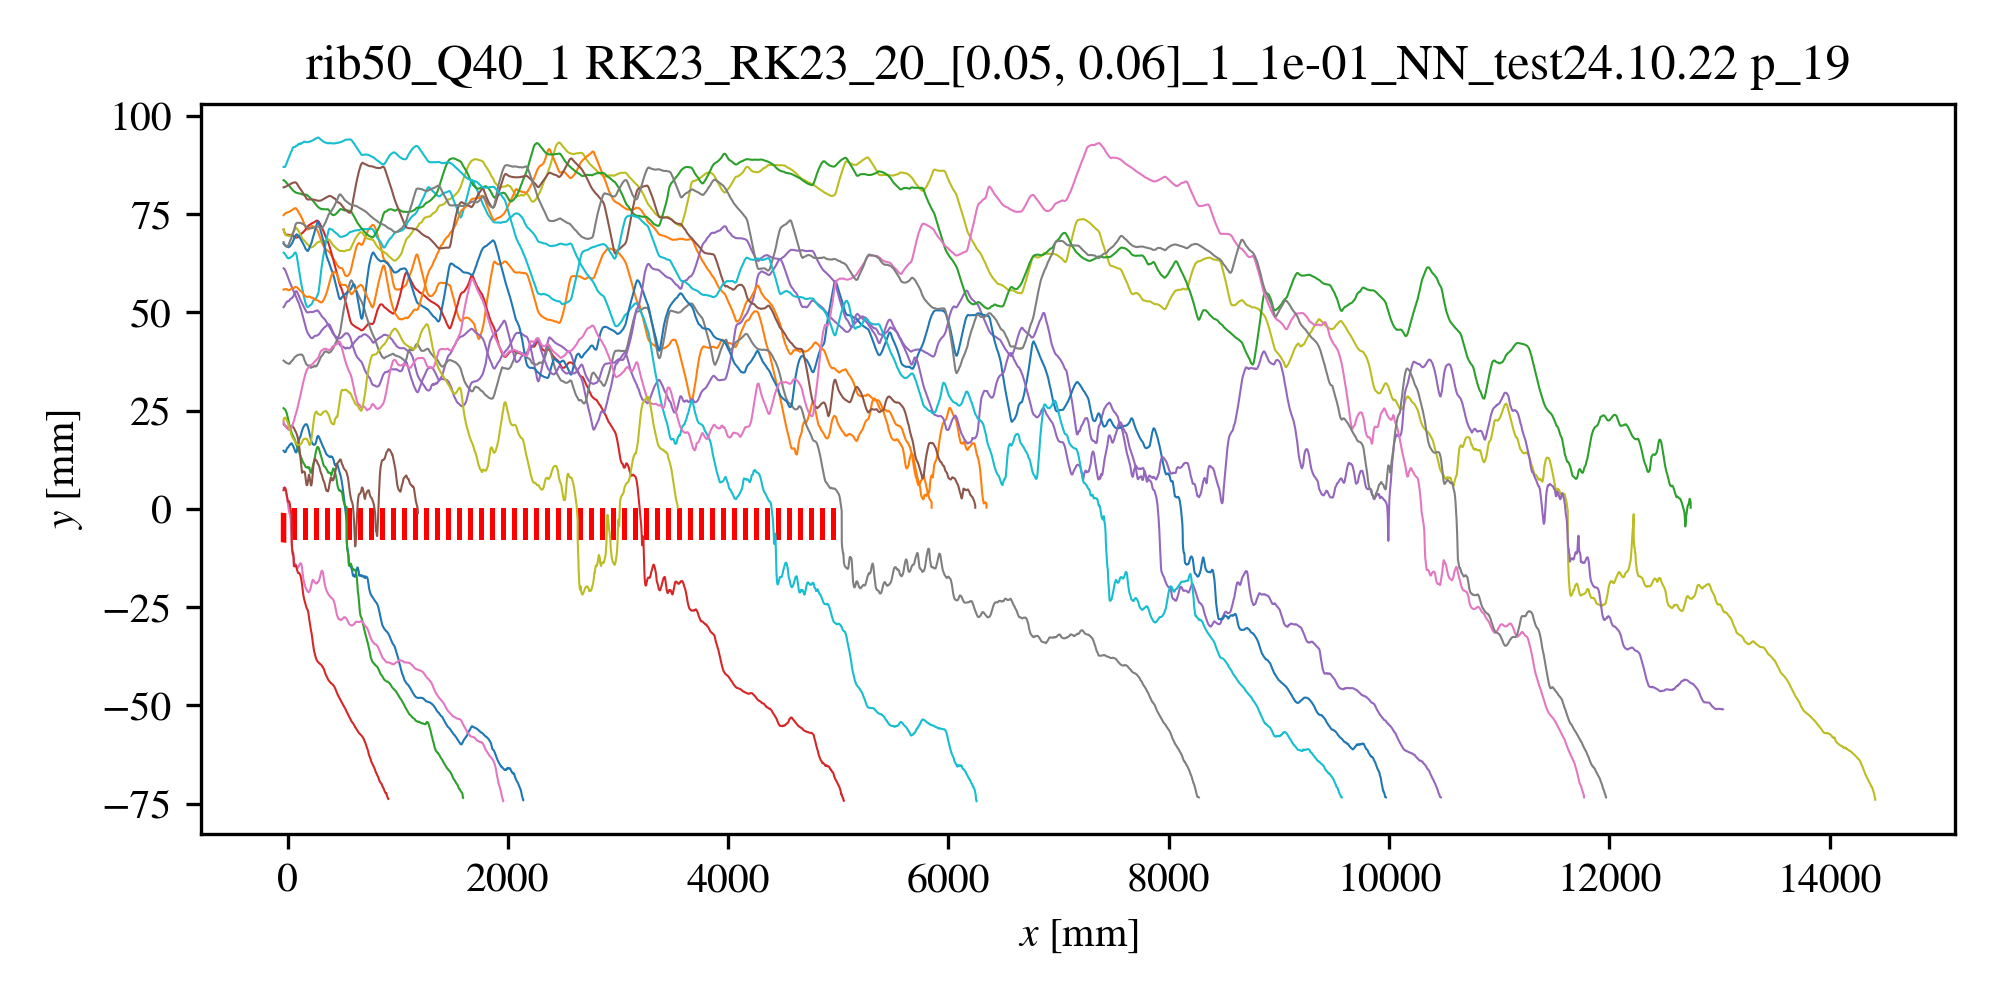

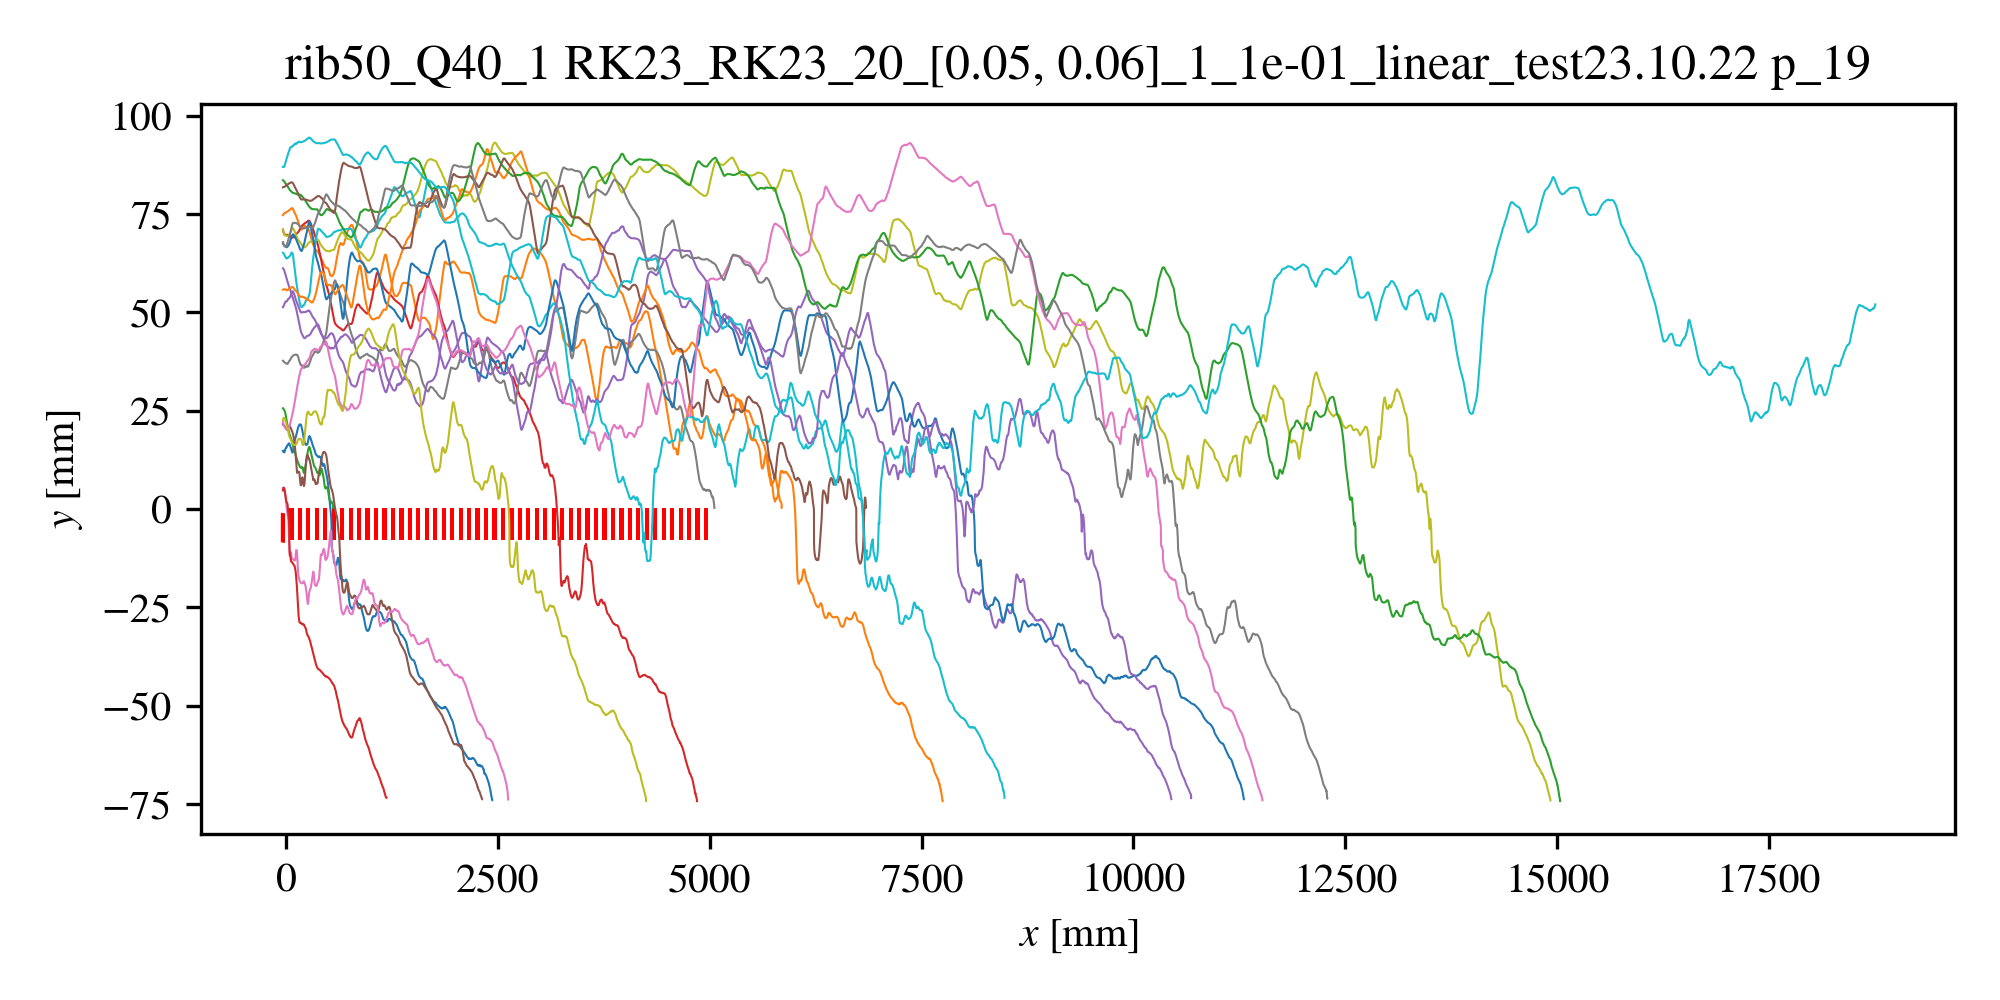

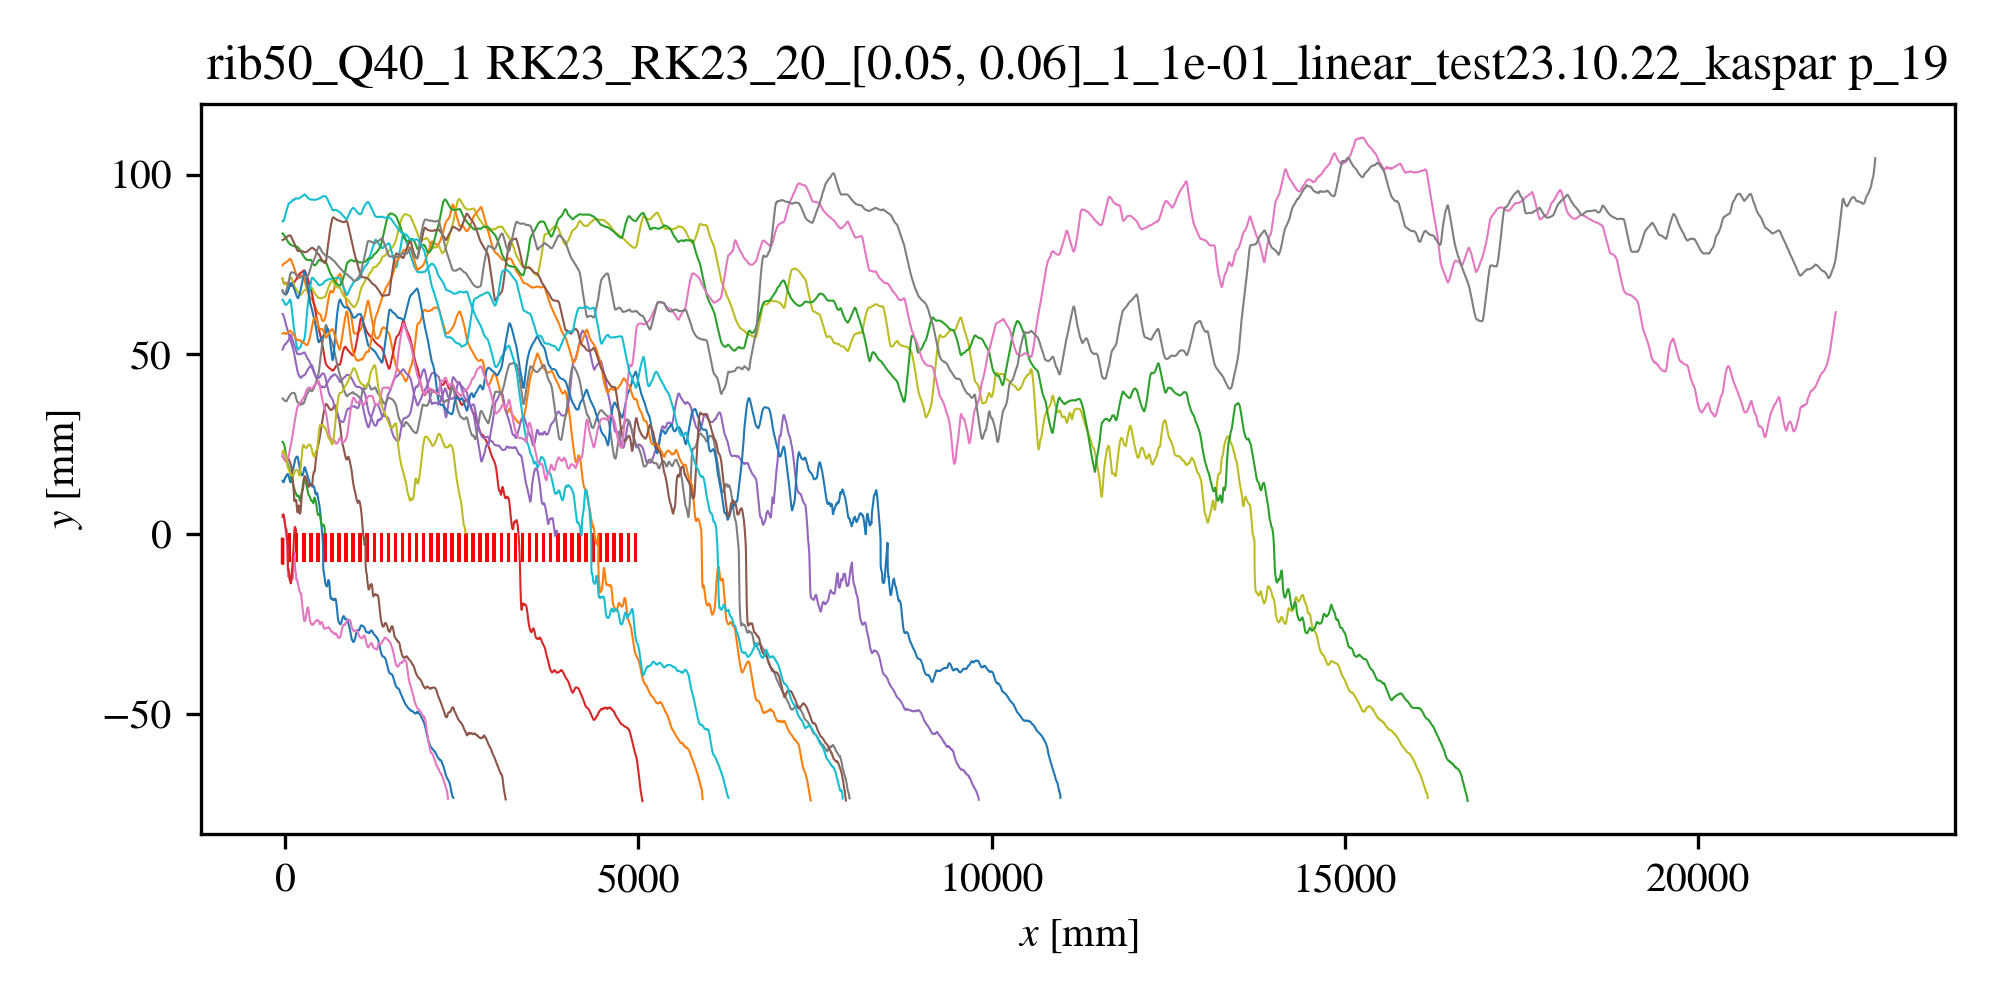

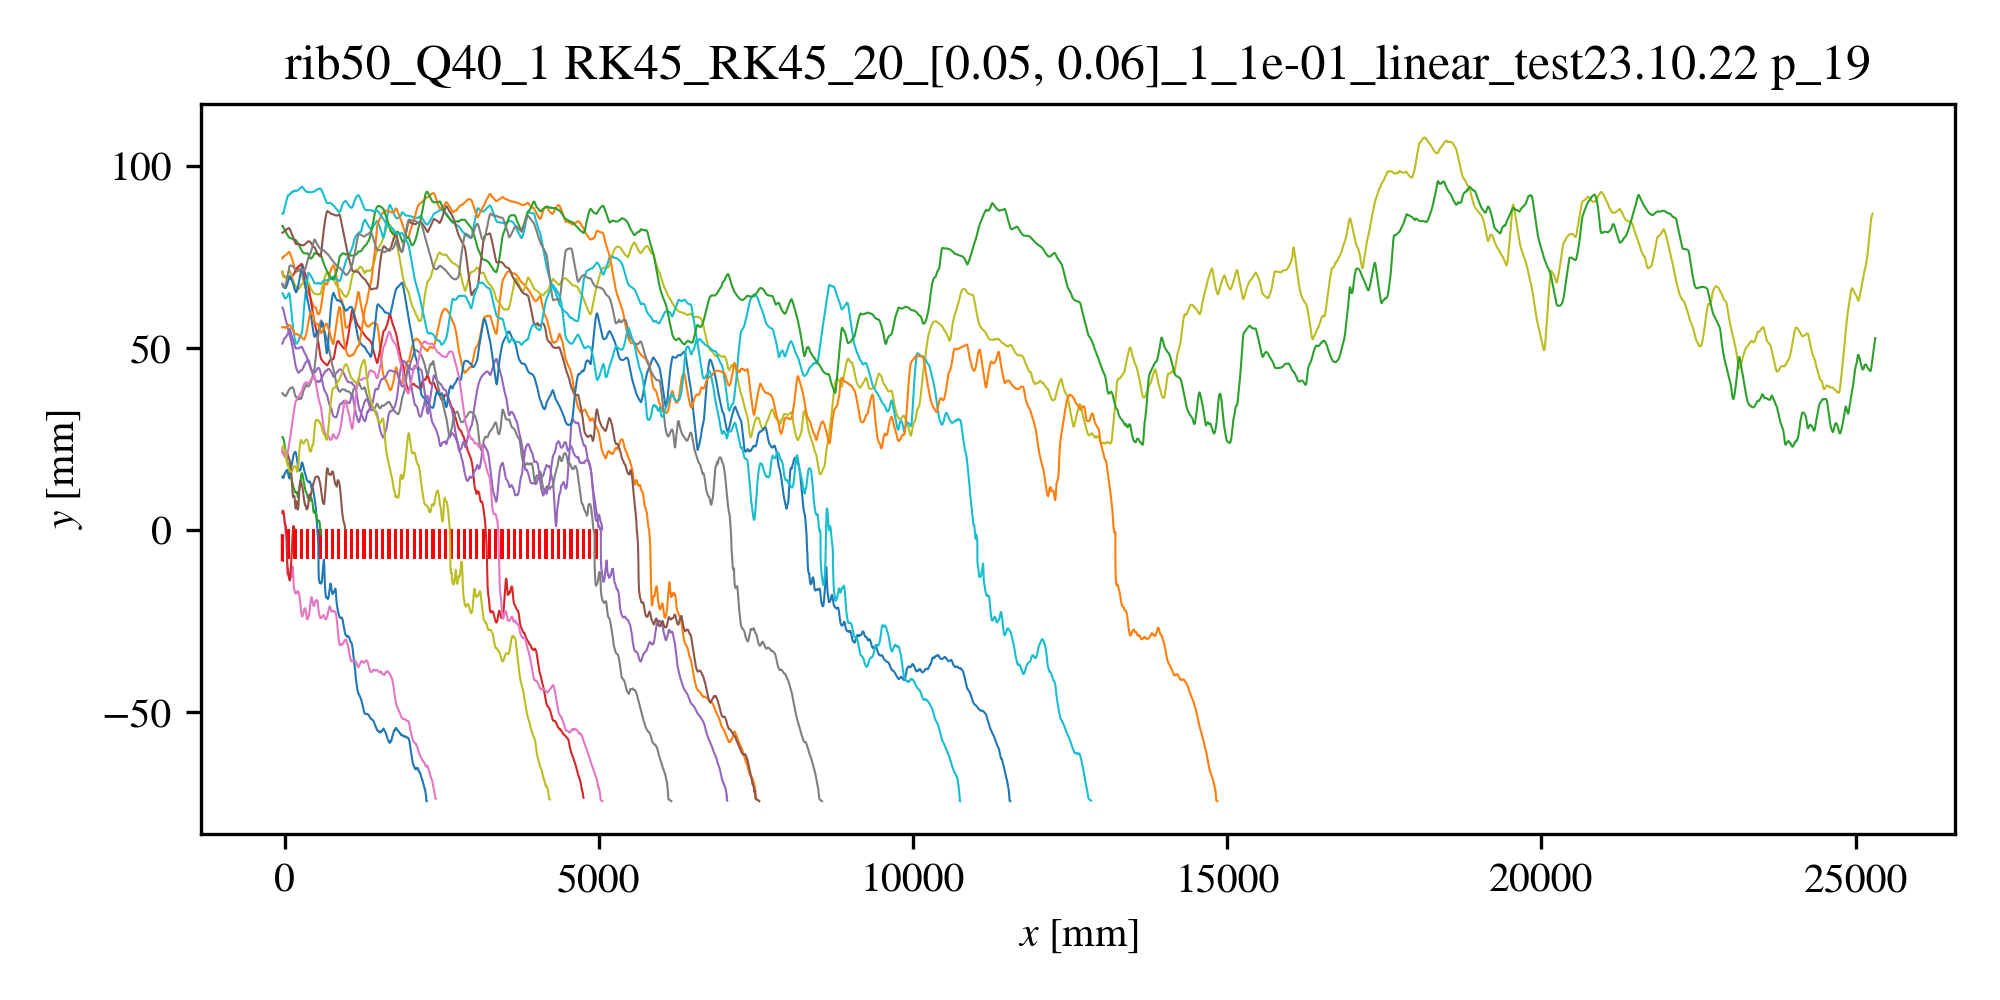

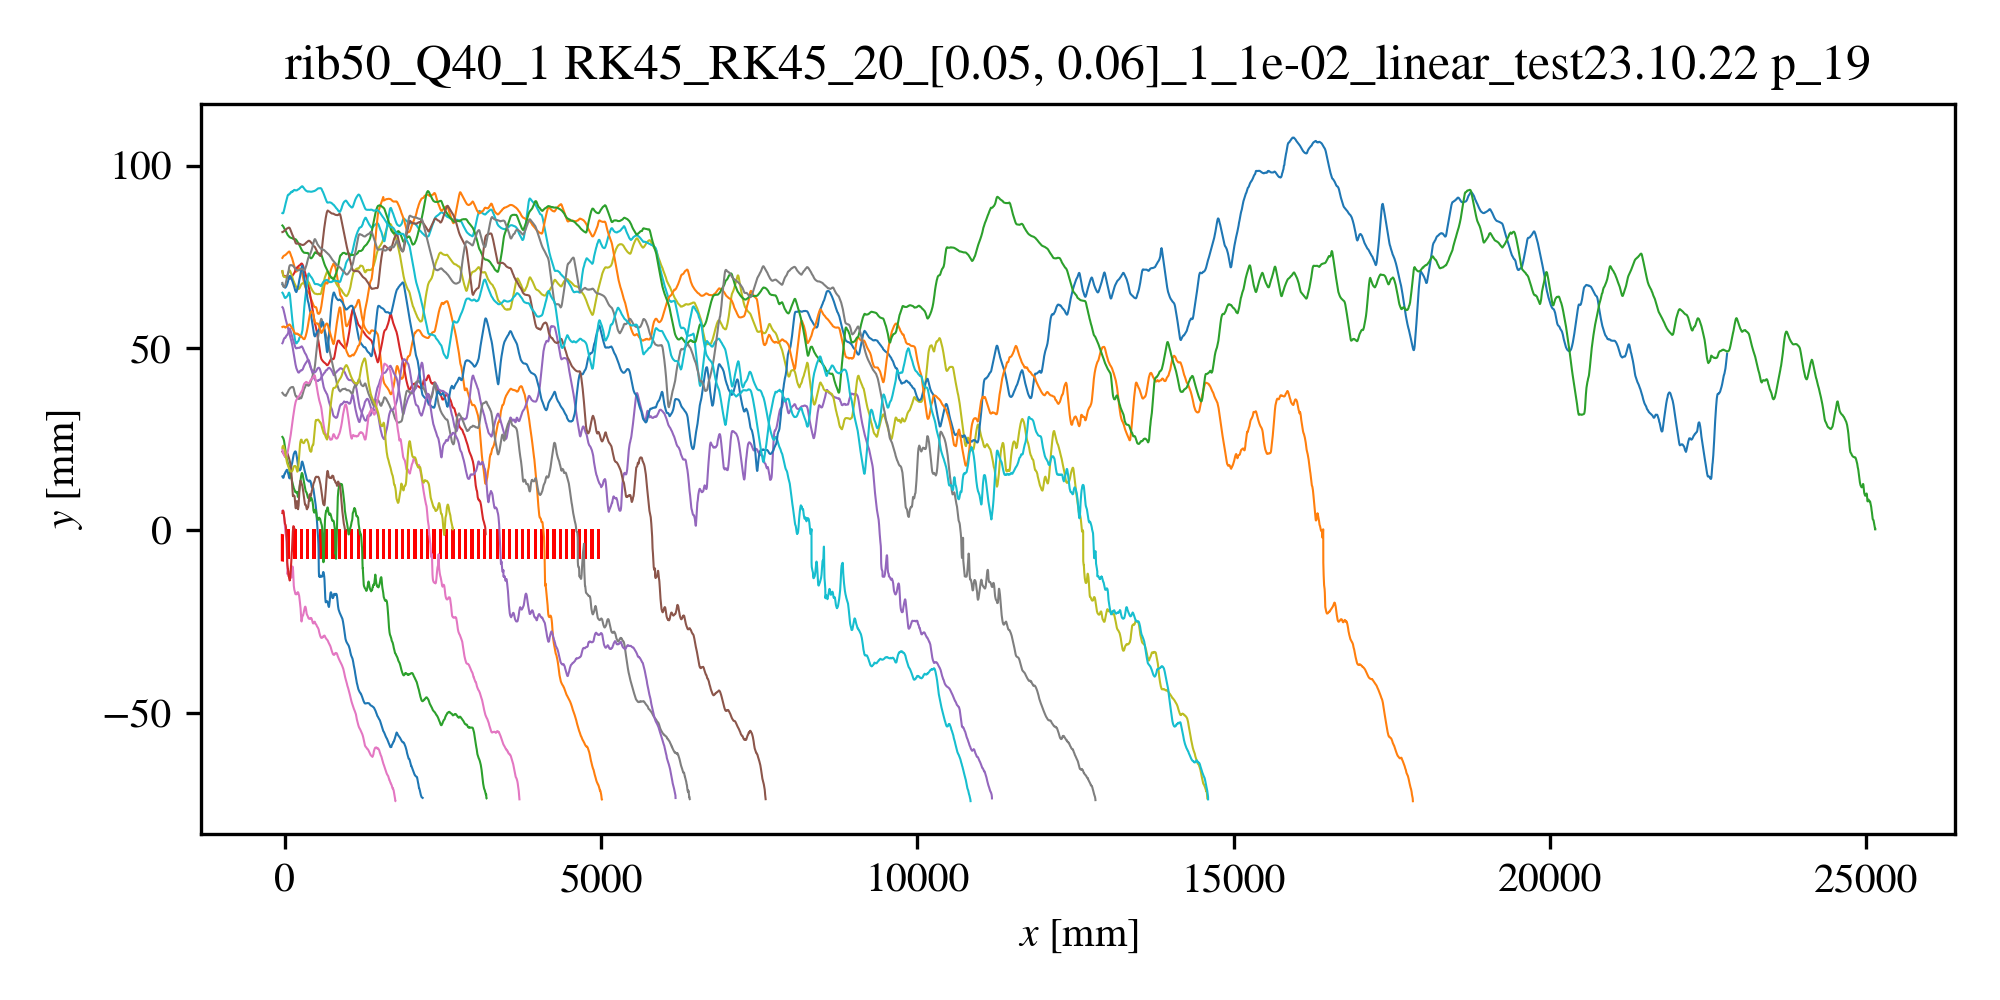

In [32]:
plt.close('all') 
#partikkelfil= Path("./partikkelsimulasjonar/particles_rib50_Q40_1_BDF_200_[0.05, 0.06]_1e-01_linear.pickle")
for partikkelfil in sorted(Path("./runs/").rglob("*_20_*")):
   # if not partikkelfil.name == "RK45_RK45_50_[0.05, 0.06]_1_1e-02_linear_test25.10.22.pickle":
    #    continue
    with open(partikkelfil, 'rb') as fil:
        partiklar = pickle.load(fil)
    skalering = 1
    myDPI = 300
    with h5py.File(Path("data").joinpath(partikkelfil.parents[0].name+"_ribs").with_suffix(".hdf5"),'r') as fil:
        h5py_ribs = np.asarray(fil['ribs'])
    del fil

    ribs = []
    for r in h5py_ribs:
        ribs.append(Rib(r))
    
    x = (ribs[0].get_rib_middle()[0],ribs[1].get_rib_middle()[0])
    x_width = x[1] - x[0]

    fig, ax  = plt.subplots(figsize=(2000/myDPI,1000/myDPI),dpi=myDPI)
    ax.add_patch(Polygon(ribs[0].vertices, facecolor='red'))
    for i in range(int(5000/x_width)):
        ax.add_patch(Polygon(ribs[1].vertices+ i* np.asarray([x_width, 0]), facecolor='red'))

    for p in partiklar:
        if p.index >=0 and p.index < 200:
            sti = p.sti_dict
            init = int(sti['init_time'])
            final = int(sti['final_time'])
            plott_array = np.zeros((final+1-init,4))
            for frame in range(init,final+1):
                plott_array[frame-init,:] = np.asarray(sti[frame]['position'])+np.asarray([sti[frame]['loops']*x_width,0,0,0])
        # if not np.any(plott_array[:,1]<0):
            #     continue

            ax.plot(plott_array[:,0], plott_array[:,1], linewidth=0.5, label=p.index)
            ax.set_title(f"{partikkelfil.parent.name} {partikkelfil.stem} p_{p.index}")
            ax.set_xlabel(r'$x$ [mm]')
            ax.set_ylabel(r'$y$ [mm]')
            #ax.legend()
            # if p.index > 0:
    plt.tight_layout()

In [22]:
for partikkelfil in sorted(Path("./runs/").rglob("*_50_*")):
    print(Path("data").joinpath(partikkelfil.parents[0].name+"_ribs").with_suffix(".hdf5"))

data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5


In [33]:
fil = h5py.File("./data/rib75_Q40_1.hdf5")
np.asarray(fil['ribs'])

array([[-80.77600276,  89.29260305],
       [-80.77600276,  -9.13120031],
       [-48.37780165,  -9.13120031],
       [-48.37780165, -17.03320058],
       [-61.81120211, -20.89640071],
       [-80.51260275, -20.89640071],
       [-80.51260275, -82.26860281],
       [ 88.50240302, -82.26860281],
       [ 88.50240302, -20.80860071],
       [ 32.04700109, -19.40380066],
       [ 24.93520085, -15.45280053],
       [ 24.93520085,  -8.34100028],
       [ 74.10320253,  -8.6922003 ],
       [ 88.41460302,  -9.21900032],
       [ 88.41460302,  89.29260305]])